# Single Index Model 
***

In [1]:
# Import libraries required for computation and analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as stats

from returns import log_returns

### Single index model

\begin{equation*}
    r_{i,t} - r_f = \alpha_i + \beta_i(r_{m,t}-r_f) + \epsilon_{i,t}
\end{equation*}

where:

- $r_{i,t}$ is the return to stock $i$ in stock period $t$
- $r_f$ is the risk-free rate 
- $r_{m,t}$ is the return to the market portfolio
- $\epsilon_{i,t} \sim N(0, \sigma_i)$

### Approach

**Approach :** In terms of the single-index model the alpha is the intercept and the beta is the slope coefficient. In financial terms alpha is the excess return on an investment whilst beta is the the measure of the volatility relative to a benchmark, in this case the S&P 100 index. To find these parameters requires the use of of OLS parameter regression estimation to compute the alpha and beta of each stock.

Before the parameters are computed we have to organise and prepare the data for regression. This requires calculating log returns for all the stocks and the index, then converting them to simple returns, then compute the excess returns which is affected by the risk-free rate and finally the OLS regression.

### Loading financial data

Loading stocks in S&P 100

In [2]:
# Set .csv data file containing stock data to DataFrame prices
prices = pd.read_csv('s_and_p_100.csv')

# Set index of stock prices to dates
prices.set_index(pd.to_datetime(prices['Date']),inplace  = True)
# Removes the column containing dates
prices.drop(columns = 'Date')
# Rename BRK-B stock by changing '-' to '_'
prices = prices.rename(columns = {'BRK-B' : 'BRK_B'})
prices.head(3)

,Date,AAPL,ABBV,ABT,ACN,AGN,AIG,ALL,AMGN,AMZN,...,UNP,UPS,USB,UTX,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2010-01-04,27.406532,NaN,21.194162,35.052402,39.233837,23.243692,25.586843,50.156246,133.899994,...,27.789530,46.125214,19.436718,59.234444,18.397221,21.143955,31.539467,22.523083,44.424107,54.621700
2010-01-05,2010-01-05,27.453915,NaN,21.022924,35.269032,38.844330,22.808218,26.007540,49.721764,134.690002,...,28.176256,46.204498,19.929434,58.349625,18.186405,21.182079,31.285799,23.141388,43.981754,54.834965
2010-01-06,2010-01-06,27.017223,NaN,21.139675,35.643974,38.970917,22.660460,26.015955,49.348106,132.250000,...,28.218761,45.863583,20.141808,58.043648,17.942194,20.573015,31.049047,23.174374,43.883450,55.308914


Loading S&P 100 index 

In [4]:
# import data function from pandas datareader library
from pandas_datareader import data

# Obtain SP100 financial data from yahoo finance for the coresponding dates 
SP100 = data.DataReader("^OEX","yahoo","2010-01-04","2017-11-27")
prices_SP100 = pd.DataFrame({"SP100" : SP100['Adj Close']}, index = SP100.index[:])
returns_SP100_monthly = log_returns(prices_SP100, 'SP100', 'M')
returns_SP100_monthly.head(3)

,SP100
Date,
2010-02-28,0.021916
2010-03-31,0.055443
2010-04-30,0.009989


### Computing log-returns

First step is to compute the log-returns for all the stock in the 'prices' dataframe which contains all the stock prices for the stocks in the S&P 100. This is done by using a for loop which goes through all the stock tickers, then computes the monthly log-returns using the log-return function from exercise 1 then is added to a new dataframe which will contain all the log-returns for the stocks as shown below. Whilst the monthly returns for the index has already been computed in the exercise before.

In [3]:
# Create empty dataframe and assign to variable
all_returns = pd.DataFrame()

# For loop to loop through all stocks in prices dataframe
for i in prices.columns[1:]:
    # Computes log-returns of current stock in for loop
    x = log_returns(prices, i, 'M')
    # Use of concat to add log-returns to dataframe
    all_returns = pd.concat([all_returns, x], axis = 1)

# Return head of data frame
all_returns.head()
    

,AAPL,ABBV,ABT,ACN,AGN,AIG,ALL,AMGN,AMZN,AXP,...,UNP,UPS,USB,UTX,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-28,0.063347,NaN,0.024997,-0.025199,0.037636,0.022042,0.043158,-0.032499,-0.057520,0.013975,...,0.111631,0.024921,-0.018918,0.023618,0.044877,-0.016796,-0.018596,-0.037356,0.011907,0.015311
2010-03-31,0.138431,NaN,-0.029920,0.048349,0.048563,0.320836,0.039653,0.055489,0.136894,0.081669,...,0.084361,0.092148,0.052239,0.069759,0.065249,0.069753,0.051165,0.129500,0.033524,0.030007
2010-04-30,0.105280,NaN,-0.020889,0.048235,0.024827,0.130525,0.011080,-0.043199,0.009748,0.111353,...,0.031689,0.070864,0.033811,0.018040,-0.008827,-0.055449,-0.053723,0.061985,-0.035888,0.011725
2010-05-31,-0.016256,NaN,-0.072966,-0.151100,0.031958,-0.094848,-0.057797,-0.101471,-0.088724,-0.145623,...,-0.052708,-0.089903,-0.110896,-0.100644,-0.213369,-0.048929,-0.088768,-0.141768,-0.053342,-0.107369
2010-06-30,-0.021047,NaN,-0.016536,0.029673,-0.084791,-0.026928,-0.064038,0.015712,-0.138257,0.000227,...,-0.027247,-0.098198,-0.067417,-0.037347,-0.023882,0.018006,-0.182322,-0.113956,-0.050502,-0.057703


### Computing simple returns

Next step is to compute the simple returns for both the monthly stock returns and the monthly index returns which we have already computed in the exercise before. Simple returns are calculated using the monthly returns by taking the exponential then subtracting one. Once this is done the excess returns for the stocks and the index have to be computed. The excess returns are the simple returns affected by the risk-free rate which in this case is set to 1% which corresponds to 0.01. The risk-free rate is subtracted from the simple returns to give us the excess returns for the individuals stocks and the index. Then the two returns are concatenated into one dataframe as within OLS regression method used will required comparing the individual stock to the index which is done by using the column names so to allow the data to be used requires both excess stock and index returns to be in one dataframe.

In [6]:
# Compute simple returns
stock_simple = np.exp(all_returns) - 1
index_simple = np.exp(returns_SP100_monthly) - 1 

# risk free rate
rr = 0.01

# Compute excess returns
stock_excess = stock_simple - rr
index_excess = index_simple - rr

# Create DataFrame consistsing both stocks and index
OLS_est = pd.concat([index_excess, stock_excess],axis = 1)

OLS_est.head(4)

,SP100,AAPL,ABBV,ABT,ACN,AGN,AIG,ALL,AMGN,AMZN,...,UNP,UPS,USB,UTX,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-28,0.012158,0.055396,NaN,0.015312,-0.034884,0.028353,0.012286,0.034103,-0.041977,-0.065897,...,0.108101,0.015234,-0.028740,0.013899,0.035899,-0.026656,-0.028424,-0.046667,0.001978,0.005428
2010-03-31,0.047009,0.138470,NaN,-0.039477,0.039537,0.039761,0.368280,0.030449,0.047057,0.136706,...,0.078022,0.086527,0.043627,0.062250,0.057425,0.062243,0.042497,0.128259,0.024093,0.020461
2010-04-30,0.000039,0.101021,NaN,-0.030672,0.039417,0.015137,0.129426,0.001142,-0.052280,-0.000204,...,0.022196,0.063436,0.024390,0.008204,-0.018788,-0.063940,-0.062305,0.053946,-0.045252,0.001795
2010-05-31,-0.097399,-0.026125,NaN,-0.080367,-0.150238,0.022475,-0.100488,-0.066159,-0.106493,-0.094902,...,-0.061343,-0.095980,-0.114968,-0.105745,-0.202142,-0.057751,-0.094942,-0.142177,-0.061944,-0.111806


### OLS regression

Having processed and organised the data, the OLS regression can be computed. The OLS regression is computed by using a function from another python library called 'statsmodels' which has to be imported. The OLS regression function arguments are the formula which is the current stock in the for loop and the index which is the benchmark. For OLS regression observes the sensitivity/responsiveness of the current stock to the index (benchmark), therefore in the formula argument the index is fixed whilst the stock varies as the OLS regression has to be computed for all stocks. As the for loop goes through each stock ticker, the ticker is used in the formula to use the data for the given stock. The second argument is the data source for the stock/index excess returns which has been created.Lastly, '.fit()' is used to fit the regressed model. Once the regression has been completed the parameters alpha and beta are added to a dataframe for each stock in the prices dataframe.

In [7]:
# Import statsmodels library to workspace
import statsmodels.formula.api as sm 

# Create empty dataframe for alpha and beta values
ab_values = pd.DataFrame()

# Compute OLS regression to obtain alpha and beta using for loop to go through all stocks in prices dataframe
for i in OLS_est.columns[1:]:
    # argument for OLS which contains current stock and fixed index to be regressed 
    formula  = ('%s ~ SP100'%i)
    # Computes OLS regression of formula and fits model
    ols_result = sm.ols(formula = formula, data = OLS_est, missing = 'drop').fit()
    # Add the alpha and beta value for current stock to dataframe
    ab = pd.DataFrame({i : [ols_result.params[0] , ols_result.params[1]]}, index = ['Alpha', 'Beta'])
    # Concats the current stock parameters to dataframe for all stock paramters
    ab_values = pd.concat([ab_values, ab], axis = 1)

ab_values

,AAPL,ABBV,ABT,ACN,AGN,AIG,ALL,AMGN,AMZN,AXP,...,UNP,UPS,USB,UTX,V,VZ,WBA,WFC,WMT,XOM
Alpha,0.013958,0.012273,0.002337,0.007797,0.009092,0.006608,0.006293,0.005158,0.017831,0.003190,...,0.008173,0.001199,0.000983,-0.000359,0.011918,0.001202,0.002017,0.000984,-0.000316,-0.003698
Beta,1.061410,1.502094,0.924220,1.195358,0.547773,1.649650,0.984408,0.893661,1.142452,1.074179,...,0.934603,0.892918,0.962048,1.057362,0.878921,0.512360,1.200494,1.145458,0.361581,0.845238


Having computed alpha and beta we then have to transpose the dataframe which will later allow us to plot the distributed boxplots.

In [8]:
ab_values_T = ab_values.transpose()
ab_values_T

,Alpha,Beta
AAPL,0.013958,1.061410
ABBV,0.012273,1.502094
ABT,0.002337,0.924220
ACN,0.007797,1.195358
AGN,0.009092,0.547773
...,...,...
VZ,0.001202,0.512360
WBA,0.002017,1.200494
WFC,0.000984,1.145458
WMT,-0.000316,0.361581


To observe the alphas and betas for all stocks requires plotting the boxplot for alpha and beta coefficients. As the alphas and betas have different ranges plotting them on the same graph with the same range in the axis will not allow us to observe the alpha as it is much smaller than the beta. Therefore a subplot grid is used which will allow the alpha and beta coefficients to be plotted on the same graph but on different figures which will have different ranges in the axis and allowing the boxplots distributions to be observed.

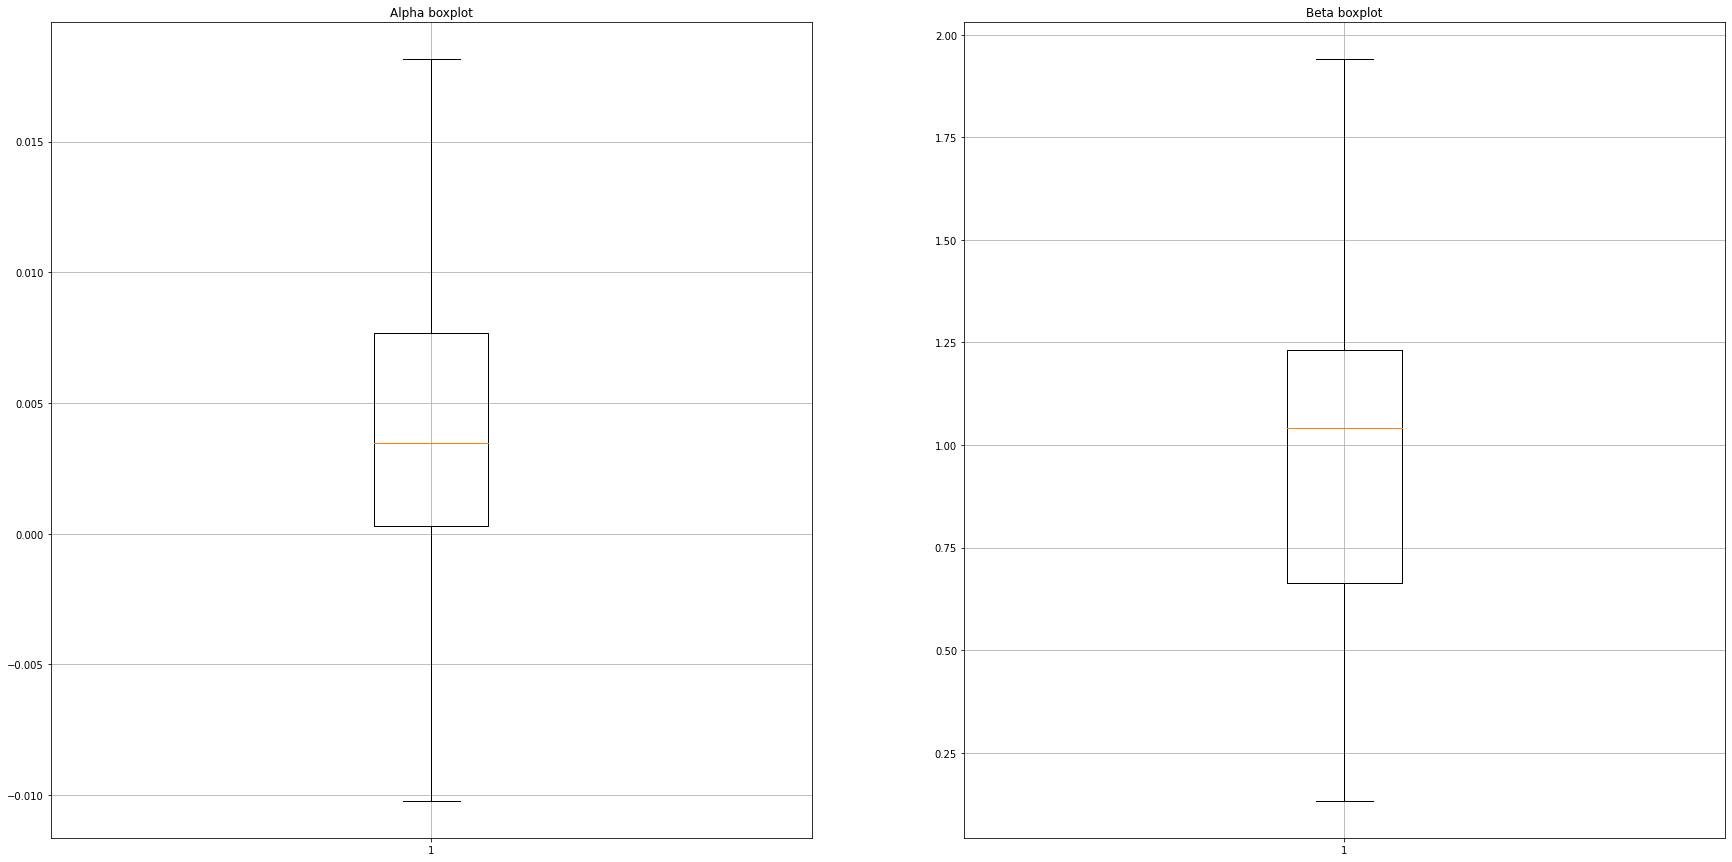

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30,15))

ax1.boxplot(x = ab_values_T['Alpha'], showfliers = False)
ax1.set_title("Alpha boxplot")
ax1.grid()
ax2.boxplot(x = ab_values_T['Beta'], showfliers = False)
ax2.set_title("Beta boxplot")
plt.grid()
plt.show()